In [1]:
import pycaret
import pandas as pd

In [2]:
data = pd.read_csv("../input/out.csv")

In [3]:
#data = data.drop("Strain", axis=1)

In [3]:
data.head()

,Fabrication Temperature,Overall Interphase thickness,Fiber Density,Number of Fibers per Tow,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Matrix Volume Fraction,Tensile Testing Temperature,Strength
0,1000,35.0,2.884,500.0,0.446,6.000,248.8,0.690,900.0,950.000
1,1000,100.0,2.884,500.0,0.660,6.500,354.0,0.340,20.0,1200.000
2,1060,450.0,2.252,400.0,0.270,6.118,195.0,0.730,20.0,664.760
3,1400,3500.0,2.900,500.0,0.270,6.030,171.0,0.682,20.0,310.798
4,1000,100.0,2.884,500.0,0.580,6.500,248.8,0.300,196.0,796.800


# Pycaret

In [4]:
from pycaret.regression import *

In [5]:
s = setup(data=data, target="Strength",session_id=123,fold=5)

,Description,Value
0,Session id,123
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(107, 10)"
4,Transformed data shape,"(107, 10)"
5,Transformed train set shape,"(74, 10)"
6,Transformed test set shape,"(33, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [6]:
best = compare_models(include=['lr','lasso','ridge','et','gbr','ada','rf','xgboost','lightgbm','knn'])
pull()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:53:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,131.2808,25170.3779,156.8352,0.6180,0.3158,0.2897,0.050
rf,Random Forest Regressor,129.5349,27594.3259,164.4535,0.5660,0.3321,0.2894,0.050
et,Extra Trees Regressor,126.8086,28071.4990,166.6264,0.5468,0.3367,0.2796,0.028
gbr,Gradient Boosting Regressor,131.4396,29645.7600,169.9707,0.4870,0.3404,0.2926,0.016
lightgbm,Light Gradient Boosting Machine,162.6923,41744.8603,201.3430,0.4241,0.3961,0.3620,0.014
lasso,Lasso Regression,169.1543,46248.1870,213.0358,0.2764,0.4266,0.3728,0.146
xgboost,Extreme Gradient Boosting,155.0727,41920.7605,201.5488,0.2440,0.3933,0.3330,0.016
ridge,Ridge Regression,180.3999,51223.8011,224.3778,0.2276,0.4346,0.3961,0.156
lr,Linear Regression,172.5489,48749.7136,218.5790,0.2060,0.4538,0.3812,0.356
knn,K Neighbors Regressor,176.7082,48769.0238,218.5314,0.1571,0.4007,0.3672,0.008


In [7]:
print(best)

AdaBoostRegressor(random_state=123)


In [16]:
print(best)

LinearRegression(n_jobs=-1)


In [9]:
mod = models()

In [10]:
mod

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
mod.columns

Index(['Name', 'Reference', 'Turbo'], dtype='object')

In [19]:
model_names = mod["Name"].index.to_list()

In [20]:
print(model_names)

['lr', 'lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'ard', 'par', 'ransac', 'tr', 'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'ada', 'gbr', 'mlp', 'xgboost', 'lightgbm', 'dummy']


In [26]:
etr = create_model('et',return_train_score=True)
pull()

MAE         MSE      RMSE      R2   RMSLE    MAPE
Split    Fold                                                        
CV-Train 0       0.9822     18.6495    4.3185  0.9998  0.0151  0.0035
         1       5.6085    597.0166   24.4339  0.9927  0.0632  0.0156
         2       1.2025     19.9849    4.4705  0.9997  0.0152  0.0039
         3       4.9827    580.1133   24.0855  0.9921  0.0615  0.0135
         4       4.5023    567.5850   23.8240  0.9917  0.0609  0.0122
CV-Val   0     108.0916  25294.1354  159.0413  0.5970  0.2975  0.2124
         1     107.7315  24168.2436  155.4614  0.4496  0.2562  0.1993
         2     186.7078  57371.9973  239.5245  0.3675  0.4635  0.4554
         3     123.8262  26747.8719  163.5478  0.6328  0.4172  0.3939
         4      72.7947   8471.2978   92.0397  0.9093  0.1320  0.1152
CV-Train Mean    3.4557    356.6699   16.2265  0.9952  0.0432  0.0097
         Std     1.9625    275.6060    9.6629  0.0037  0.0229  0.0051
CV-Val   Mean  119.8303  28410.7092  161.9229  0.5913  0.3133  0.2752
         Std    37.3767  15917.3673   46.8153  0.1860  0.1181  0.1280
Train    NaN     4.6126    476.5787   21.8307  0.9936  0.0565  0.0130

In [13]:
ada = create_model('ada')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:11:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,107.1191,13411.3725,115.8075,-0.1450,0.2293,0.1975
1,111.2360,14160.3651,118.9973,0.1922,0.3374,0.3547
2,153.6026,30345.9331,174.2008,-0.5482,0.2760,0.2595
3,236.3467,70025.6046,264.6235,0.3931,0.4123,0.4298
4,74.9952,12703.3445,112.7091,0.8533,0.2266,0.1735
5,115.4854,25057.2488,158.2948,0.2356,0.2035,0.1758
6,88.0224,10635.0435,103.1263,0.1764,0.1612,0.1309
7,172.6839,35217.9150,187.6644,0.2816,0.2537,0.2088
8,258.9834,85586.2286,292.5512,0.3320,0.5457,0.6587


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
tuned_etr = tune_model(etr)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:11:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,64.4120,7007.4652,83.7106,0.4017,0.1678,0.1228
1,128.9734,18004.9750,134.1826,-0.0271,0.3923,0.4451
2,151.2821,45956.0219,214.3736,-1.3446,0.3520,0.3170
3,248.8689,86660.2883,294.3812,0.2489,0.4593,0.4501
4,171.0336,47555.2214,218.0716,0.4508,0.3594,0.3437
5,91.7055,19125.3476,138.2944,0.4166,0.1906,0.1215
6,65.9062,9778.7024,98.8873,0.2427,0.1502,0.0934
7,191.0309,55771.8342,236.1606,-0.1377,0.2914,0.2088
8,307.1661,113982.9065,337.6135,0.1103,0.6134,0.7552


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,64.4120,7007.4652,83.7106,0.4017,0.1678,0.1228
1,128.9734,18004.9750,134.1826,-0.0271,0.3923,0.4451
2,151.2821,45956.0219,214.3736,-1.3446,0.3520,0.3170
3,248.8689,86660.2883,294.3812,0.2489,0.4593,0.4501
4,171.0336,47555.2214,218.0716,0.4508,0.3594,0.3437
5,91.7055,19125.3476,138.2944,0.4166,0.1906,0.1215
6,65.9062,9778.7024,98.8873,0.2427,0.1502,0.0934
7,191.0309,55771.8342,236.1606,-0.1377,0.2914,0.2088
8,307.1661,113982.9065,337.6135,0.1103,0.6134,0.7552


Fitting 20 folds for each of 10 candidates, totalling 200 fits


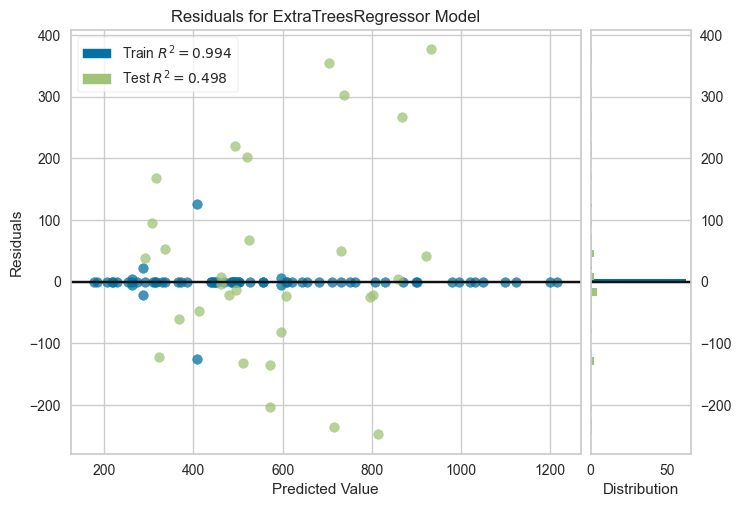

In [15]:
plot_model(tuned_etr)

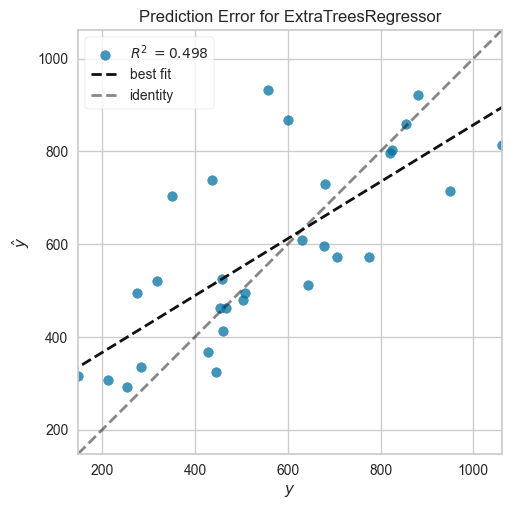

In [16]:
plot_model(tuned_etr, plot = 'error')

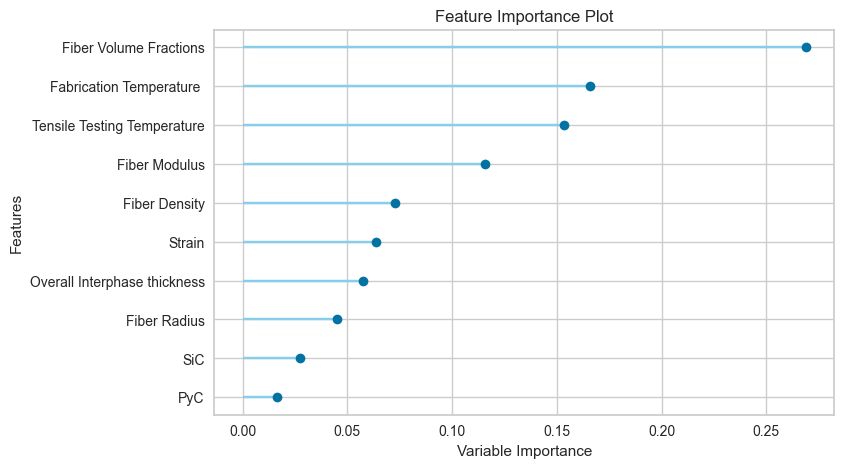

In [17]:
plot_model(tuned_etr, plot='feature')

In [18]:
evaluate_model(tuned_etr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
predict_model(tuned_etr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,120.5728,26381.9133,162.4251,0.4981,0.3175,0.2805


,PyC,SiC,BN,Fabrication Temperature,Overall Interphase thickness,Fiber Density,Fiber Volume Fractions,Fiber Radius,Fiber Modulus,Strain,Tensile Testing Temperature,Strength,prediction_label
8,1,0,0,637.599976,1400.0,2.830,0.2180,7.70,165.0,0.616,800.0,436.000000,738.134001
69,1,0,0,1200.000000,400.0,2.830,0.4360,5.80,325.0,1.340,25.0,454.000000,461.430000
50,0,0,1,94.000000,1000.0,2.350,0.2400,5.50,170.0,0.446,25.0,459.390015,411.531701
28,0,0,1,94.000000,1000.0,2.740,0.2800,7.00,270.0,0.446,25.0,456.970001,524.181600
62,0,0,0,1200.000000,400.0,2.980,0.2300,6.00,140.0,0.650,25.0,213.000000,307.227502
0,1,0,0,1000.000000,35.0,2.830,0.4360,6.00,325.0,0.200,900.0,950.000000,715.004900
5,0,0,0,1000.000000,466.0,2.980,0.4600,6.50,319.0,0.610,25.0,1061.000000,813.207600
82,3,2,0,1000.000000,150.0,2.980,0.4400,6.50,372.0,0.630,25.0,880.000000,921.960000
77,0,2,2,456.399994,600.0,2.854,0.1850,6.50,380.0,0.260,580.0,825.000000,802.598001
4,1,0,0,637.599976,100.0,2.830,0.5800,5.80,325.0,0.616,355.0,556.200012,932.526701


In [ ]:
final_etr = finalize_model(tuned_etr)

In [ ]:
predict_model(final_etr);

In [ ]:
unseen_predictions = predict_model(final_etr, data=data_unseen)
unseen_predictions.head()

# AdaBoost Regressor

In [12]:
ada = create_model('ada')
print(ada)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:54:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,129.6608,26447.7782,162.6277,0.6955,0.3228,0.3004
1,129.2849,22585.4558,150.2846,0.2938,0.2733,0.2314
2,151.0544,34088.2325,184.6300,0.6166,0.3688,0.3615
3,149.3601,29600.6879,172.0485,0.6638,0.3903,0.3664
4,97.0437,13129.7351,114.5851,0.8200,0.2238,0.1885
Mean,131.2808,25170.3779,156.8352,0.6180,0.3158,0.2897
Std,19.4764,7105.5813,23.9396,0.1755,0.0611,0.0704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AdaBoostRegressor(random_state=123)


In [13]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
tuned_ada = tune_model(ada)
print(tuned_ada)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AdaBoostRegressor(random_state=123)


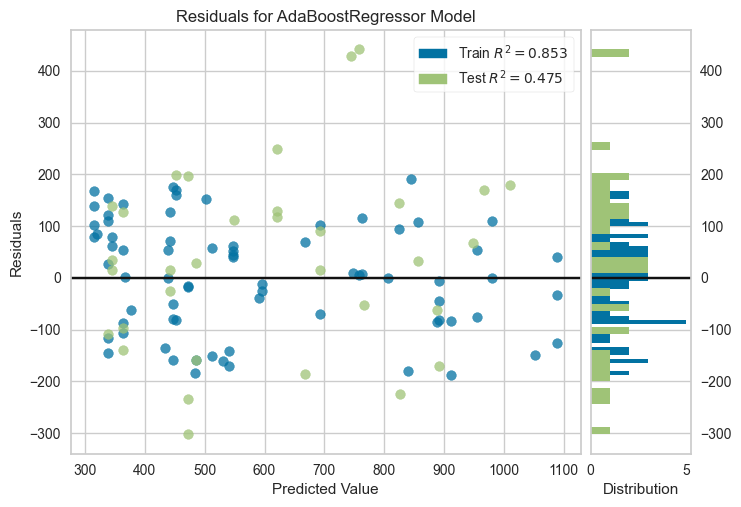

In [15]:
plot_model(tuned_ada)

In [16]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

lightgbm

In [ ]:
lightgbm = create_model('lightgbm')
print(lightgbm)

In [ ]:
tuned_lightgm = tune_model(lightgbm)
print(tuned_lightgm)

decision tree

In [17]:
dt = create_model('dt')
print(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:54:34
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,119.6771,26815.7684,163.7552,0.6913,0.3437,0.2417
1,183.3430,50793.0583,225.3732,-0.5881,0.4485,0.2801
2,139.3860,35232.1842,187.7024,0.6037,0.3765,0.3286
3,116.4738,22557.5541,150.1917,0.7438,0.3448,0.3003
4,141.0756,30659.9043,175.0997,0.5798,0.3618,0.2714
Mean,139.9911,33211.6939,180.4244,0.4061,0.3751,0.2844
Std,23.8606,9737.7302,25.6655,0.5006,0.0386,0.0290


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeRegressor(random_state=123)


In [18]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

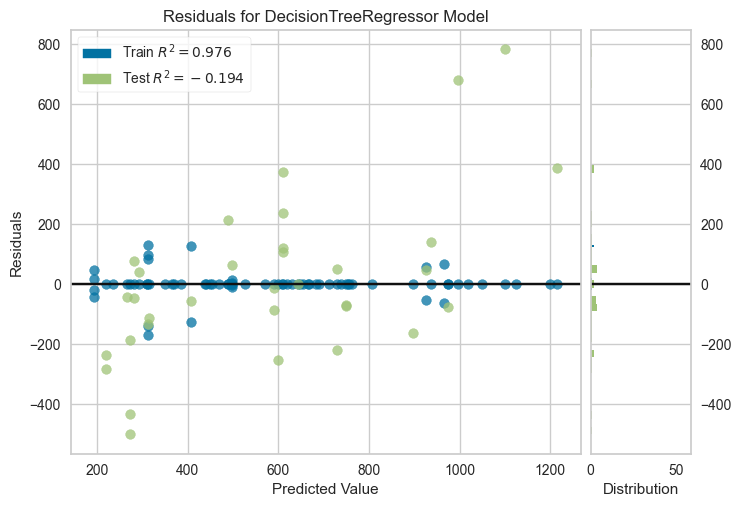

In [19]:
plot_model(dt)

In [20]:
interpret_model(dt)

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [21]:
tuned_dt = tune_model(dt)
print(tuned_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeRegressor(max_depth=14, max_features='log2',
                      min_impurity_decrease=0.5, min_samples_leaf=2,
                      random_state=123)


Extra Tree Regression (et)

In [ ]:
etr = create_model('et')
print(etr)

In [ ]:
evaluate_model(etr)

In [ ]:
tuned_etr = tune_model(etr)
print(tuned_etr)

In [ ]:
evaluate_model(tuned_etr)

Gradient Boosting Regressor (gbr)

In [ ]:
gbr = create_model('gbr')
print(gbr)

In [ ]:
tuned_gbr = tune_model(gbr)
print(tuned_gbr)

ada

In [ ]:
ada = create_model('ada')
print(ada)

xgboost

In [ ]:
xgboost = create_model('xgboost')
print(xgboost)

random forest

In [ ]:
rf = create_model('rf')
print(rf)

olr

In [ ]:
olr = create_model('lr')
print(olr)

In [ ]:
evaluate_model(olr)

tune_olr

In [ ]:
tune_olr = tune_model(olr)
print(tune_olr)

lasso

In [ ]:
lasso = create_model('lasso')
print(lasso)

ridge

In [ ]:
ridge = create_model('ridge')
print(ridge)

In [ ]:

for model in model_names:
    model = create_model(model)
    print(model)

In [ ]:
import fpdf

pdf = fpdf.FPDF(format='letter')
pdf.add_page()
pdf.set_font("Arial", size=12)

In [ ]:
model_names

In [ ]:
svm = create_model('svm')
print(svm)

# SMOTE 

from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE regressor
smote = SMOTE()

# Fit the SMOTE regressor to the data and generate synthetic samples
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Print the shape of the original and oversampled data
print("Original Data:", X.shape, y.shape)
print("Oversampled Data:", X_oversampled.shape, y_oversampled.shape)


In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE regressor
smote = SMOTE()

# Fit the SMOTE regressor to the data and generate synthetic samples
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Print the shape of the original and oversampled data
print("Original Data:", X.shape, y.shape)
print("Oversampled Data:", X_oversampled.shape, y_oversampled.shape)
